In [2]:
import pandas as pd 
df = pd.read_csv('/kaggle/input/movies-csv/movies.csv')
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [13]:
import warnings
warnings.filterwarnings("ignore")


**find number of null values**

In [15]:
df.isnull().sum()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**Sklearn**

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['budget']]
y = df['popularity']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 2)

**train model to replace null vlaue with mean**

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer.transform
imputer.fit_transform(x_train)


array([[42000000.],
       [39000000.],
       [ 2600000.],
       ...,
       [15000000.],
       [ 5000000.],
       [15000000.]])

**Saeborn**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('/kaggle/input/tip1-csv/tip (1).csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

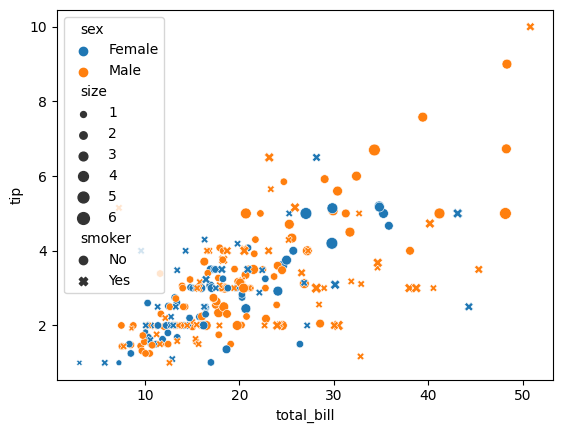

In [23]:
sns.scatterplot(x = 'total_bill', y = 'tip',data = df , hue = 'sex',style = 'smoker' , size='size')

**find outlier using figure**

<Axes: >

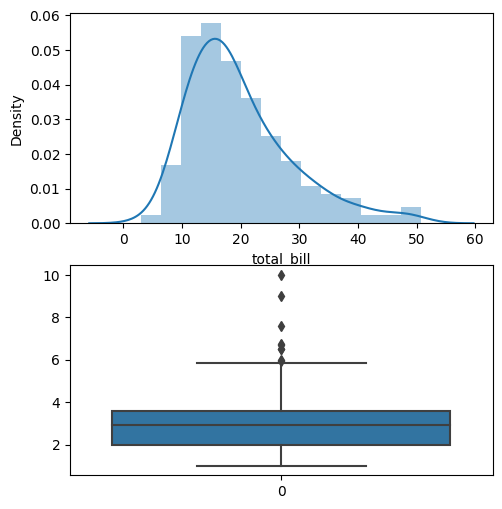

In [24]:
plt.figure(figsize =(12,6))
plt.subplot(2,2,1)
sns.distplot(df['total_bill'] )
plt.subplot(2,2,3)
sns.boxplot(df['tip'])

**using formula**

In [26]:
high = (df['tip'].mean())+(3*(df['tip'].std()))
low = (df['tip'].mean())-(3*(df['tip'].std()))
df[(df['tip']>high) | (df['tip']<low)]['tip']

23      7.58
170    10.00
212     9.00
Name: tip, dtype: float64

In [27]:
high

7.149193255528139

In [28]:
low

-1.152635878478958

In [30]:
df['tip'] = df[(df['tip']<high) & (df['tip']>low)]['tip']

<Axes: >

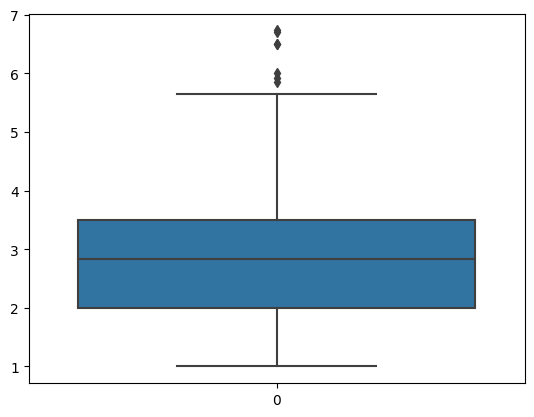

In [32]:
sns.boxplot(df['tip'])

<Axes: >

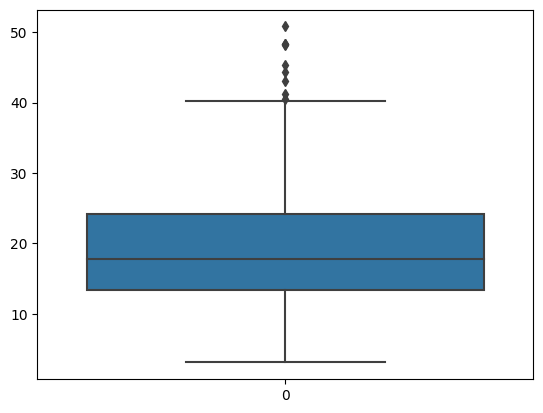

In [34]:
sns.boxplot(df['total_bill'])

**find outlier using z-score method**

In [35]:
z = (df['total_bill'] - df['total_bill'].mean())/(df['total_bill'].std())

**Triming:** remove rows with outlier

In [36]:
df['z'] = z
df = df[(df['z']<3) & (df['tip']>-3)]

**Capping :** replace outlier with minimum and maximum values

In [40]:
import numpy as np
df['tip'] = np.where(df['tip']>high , high , np.where(df['tip']<low , low , df['tip']))

<Axes: >

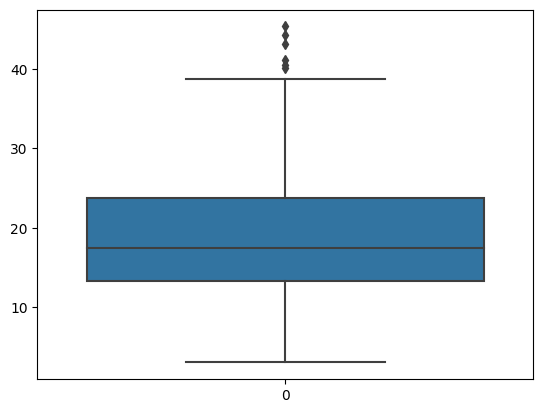

In [43]:
sns.boxplot(df['total_bill'])

**handle outlier using quantile**

<Axes: >

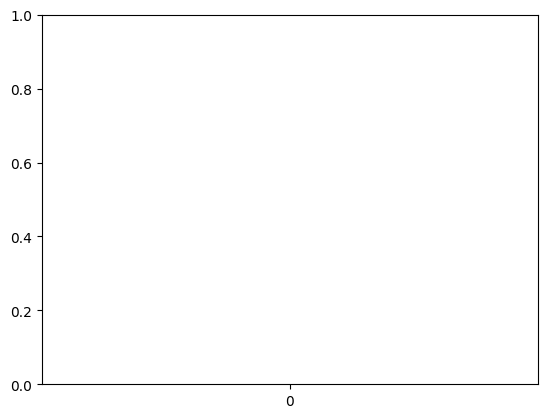

In [49]:
import numpy as np
import seaborn as sns

# IQR method to remove outliers
upper = np.quantile(df['tip'], 0.75)
lower = np.quantile(df['tip'], 0.25)
iqr = upper - lower

up = upper + 1.5 * iqr
low = lower - 1.5 * iqr

# Remove outliers
df['tip'] = df[(df['tip'] < up) & (df['tip'] > low)]['tip']

# Boxplot to visualize
sns.boxplot(df['tip'])


<Axes: xlabel='tip'>

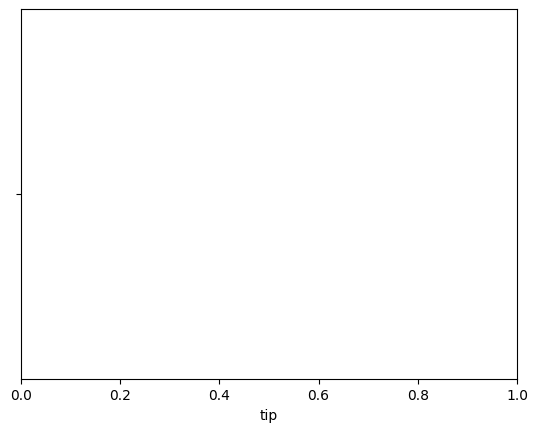

In [48]:
sns.boxplot(x = df['tip'] , data = df , hue = 'sex')